Leveraging the power of BERT and TF-IDF, I have been able to create easily interpretable topics. When some NLP-based analysis is to be done , you are often asked to identify the topics that frequently appear in documents. To do this, you rely on unsupervised techniques such as Topic Modeling.

Although traditional topic models such as LDA and NMF have been successful, though they require a lot of hyperparameter tuning to create meaningful topics. This is why  exploring transformer-based models such as BERT,shows remarkable results in various NLP tasks. Pre-trained models are especially helpful as they are believed to contain more accurate representations of words and sentence.

## 1. Data & Packages
For this modelling, we use the famous 20 Newsgroups dataset which contains roughly 18000 newsgroups posts on 20 topics. Using Scikit-Learn, we can quickly download and prepare the data:


In [1]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')['data']

## 2. Embeddings
The initial step we must take is to convert our documents into numerical data. To do this, we can leverage BERT, which extracts context-dependent embeddings for each word. Additionally, there are many pre-trained models available that can be used right away.

The method you choose to generate BERT embeddings for a document is up to you. However, I recommend using the sentence-transformers package, as the resulting embeddings have proven to be of superior quality and have consistently delivered excellent results for document-level embeddings.

Before generating the document embeddings, make sure to install the package with pip install sentence-transformers.

In [2]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=1b94dff8417fb11a2f94729f2b3862e6e05872e2fa39ce6150c3b10e03239040
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

We are using Distilbert as it gives a nice balance between speed and performance. The package has several multi-lingual models available for us to use.

## 3. Clustering
To ensure that documents with similar topics are grouped together, we must first reduce the dimensionality of the embeddings. Many clustering algorithms are not well-suited to high-dimensional data, so this is a necessary step. UMAP is one of the best-performing dimensionality reduction algorithms, as it preserves a significant portion of the local structure of the data in lower dimensions. To get started, install the UMAP package with pip install umap-learn. We recommend reducing the dimensionality to 5 and keeping the size of the local neighborhood at 15. However, you may need to adjust these values to optimize the topic creation. Keep in mind that too low of a dimensionality will result in a loss of information, while too high of a dimensionality will lead to poorer clustering results.

In [4]:
!pip install umap-learn
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=dcb6044b8eed89741591a94500f495a6d216af2682fd4dae9de8aa166192f6ed
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=39bafb9aad2796af5a86c90c0eff8e3c7e5a6c6faed9f996fa92e433a96b9fdf
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


## HDBSAN
After having reduced the dimensionality of the documents embeddings to 5, we can cluster the documents with HDBSCAN. HDBSCAN is a density-based algorithm that works quite well with UMAP since UMAP maintains a lot of local structure even in lower-dimensional space. Moreover, HDBSCAN does not force data points to clusters as it considers them outliers.

In [5]:
!pip install hdbscan
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700888 sha256=f0569c4047e88252c5f676e18daffeee45e5b6335936aa061a4869d578f2f8ba
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


Great! We now have clustered similar documents together which should represent the topics that they consist of. To visualize the resulting clusters we can further reduce the dimensionality to 2 and visualize the outliers as grey points:

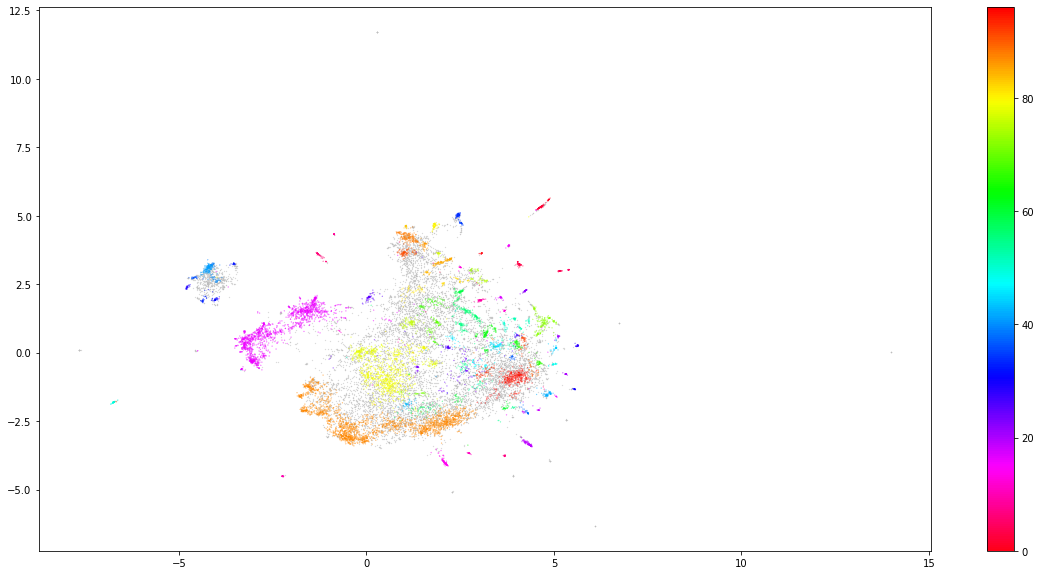

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

It is difficult to visualize the individual clusters due to the number of topics generated (~55). However, we can see that even in 2-dimensional space some local structure is kept.

## 4. Topic Creation
By applying a class-based variant of TF-IDF (c-TF-IDF), we can gain insight into what makes each cluster of documents unique compared to the other. This method works by treating all documents in a single category (e.g., a cluster) as a single document and then applying TF-IDF. The result is a very long document per category, and the resulting TF-IDF score reveals the important words in a topic. This allows us to derive topics from clustered documents and gain a better understanding of the differences between them.

## c-TF-IDF
To create this class-based TF-IDF score, we need to first create a single document for each cluster of documents:

In [12]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

Then, we apply the class-based TF-IDF:
class-based TF-IDF by joining documents within a class.
Where the frequency of each word t is extracted for each class i and divided by the total number of words w. This action can be seen as a form of regularization of frequent words in the class. Next, the total, unjoined, number of documents m is divided by the total frequency of word t across all classes n.

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

Now, we have a single importance value for each word in a cluster which can be used to create the topic. If we take the top 10 most important words in each cluster, then we would get a good representation of a cluster, and thereby a topic.

## Topic Representation
In order to create a topic representation, we take the top 20 words per topic based on their c-TF-IDF scores. The higher the score, the more representative it should be of its topic as the score is a proxy of information density.

In [14]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
0,-1,9850
88,87,2049
17,16,1611
80,79,774
96,95,280
79,78,269
89,88,175
73,72,145
42,41,141
57,56,117


We can use topic_sizes to view how frequent certain topics are:
The topic name-1 refers to all documents that did not have any topics assigned. The great thing about HDBSCAN is that not all documents are forced towards a certain cluster. If no cluster could be found, then it is simply an outlier.

We can see that topics 7, 43, 12, and 41 are the largest clusters that we could create. To view the words belonging to those topics, we can simply use the dictionarytop_n_words to access these topics:

In [19]:
top_n_words[7][:10]

[('buffalo', 0.08587055164349307),
 ('ra', 0.059180072505627575),
 ('gb', 0.025589129386847303),
 ('acsu', 0.02524735668749657),
 ('cc', 0.025171732773554275),
 ('ubvmsd', 0.02417642433247796),
 ('ubvmsb', 0.024029092750297847),
 ('jesus', 0.021825630413513784),
 ('kt', 0.018524520690089908),
 ('hammerl', 0.01813607178464788)]

In [16]:
top_n_words[43][:10]

[('apple', 0.06505079676782982),
 ('sound', 0.022881204702533017),
 ('fpu', 0.021243101090471804),
 ('cd', 0.017790407705895902),
 ('umcc', 0.01650277045817908),
 ('c650', 0.015677218410268586),
 ('soundbase', 0.015153658826066957),
 ('mac', 0.0147293493118286),
 ('stereo', 0.014162067393647866),
 ('ferch', 0.013863932330074201)]

In [17]:
top_n_words [12][:10]

[('uic', 0.056990619809689766),
 ('uicvm', 0.05258865359706527),
 ('jason', 0.047564833790328914),
 ('u28037', 0.045217822837800195),
 ('kratz', 0.04078926548565852),
 ('freeman', 0.03320150891325269),
 ('illinois', 0.032544050712665105),
 ('chicago', 0.03245857145908073),
 ('concealed', 0.031425053140081066),
 ('gun', 0.029986454891912418)]

In [18]:
top_n_words[41][:10]

[('nasa', 0.03441242525979701),
 ('gov', 0.021749977369284735),
 ('jpl', 0.015072105516427707),
 ('space', 0.013914024473856966),
 ('spacecraft', 0.011846179108065675),
 ('planet', 0.01011183904723432),
 ('station', 0.00928944214756579),
 ('earth', 0.009058437146020315),
 ('larc', 0.008411518190300954),
 ('solar', 0.00815940839330318)]

Looking at the  topics, I would say that these nicely seem to represent easily interpretable topics!

I can see nasa, planet, space,station etc. as clear topics that were extracted from the data.

## 5.Topic Reduction
There is a chance that, depending on the dataset, you will get hundreds of topics that were created! You can tweak the parameters of HDBSCAN such that you will get fewer topics through its min_cluster_size parameter but it does not allow you to specify the exact number of clusters.

A nifty trick that Top2Vec was using is the ability to reduce the number of topics by merging the topic vectors that were most similar to each other.

We can use a similar technique by comparing the c-TF-IDF vectors among topics, merge the most similar ones, and finally re-calculate the c-TF-IDF vectors to update the representation of our topics:

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(data)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

,Topic,Size
0,-1,9850
70,69,2086
14,13,1611
64,63,791
76,75,280
63,62,269
71,70,213
34,33,161
58,57,145
47,46,137


Above, we took the least common topic and merged it with the most similar topic.


## Conclusion
 We can bypass the recalculation step of this pipeline to expedite the topic reduction process. However, it is more precise to recalculate the c-TF-IDF vectors as this will more accurately reflect the newly generated content of the topics.
Topic Modelling using Bert remains a powerful technique for analysing large amounts of text data. It provides deeper insight into the semantic relationships between words and what topics distinguish them from each other. Furthermore, it allows for greater granularity in terms of topic detection and offers more robustness when handling data imbalance. While there are some limitations to this approach, such as difficulty mastering rare events or weighing in various topics accurately, overall this is still one of the most effective ways to analyse documents and extract meaningful insights from them.